In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/liuzihe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# shape: [200, 1]
data_x = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, data_x.shape)
# shape: [200, 1]
data_y = np.square(data_x) + noise

In [5]:
input_x = tf.placeholder(tf.float32, [None, 1])
input_y = tf.placeholder(tf.float32, [None, 1])

In [6]:
# shape: [1, 10]
hidden_weights = tf.Variable(tf.random_normal([1, 10]))
hidden_bias = tf.Variable(tf.zeros([1, 10]))
# shape: [200, 10]
hidden_result = tf.matmul(input_x, hidden_weights) + hidden_bias
hidden_output = tf.nn.tanh(hidden_result)

In [7]:
# shape: [10, 1]
output_weights = tf.Variable(tf.random_normal([10, 1]))
output_bias = tf.Variable(tf.zeros([1, 1]))
# shape: [200, 1]
output_result = tf.matmul(hidden_output, output_weights) + output_bias
predicted_y = tf.nn.tanh(output_result)

In [8]:
loss = tf.reduce_mean(tf.square(input_y - predicted_y))
train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

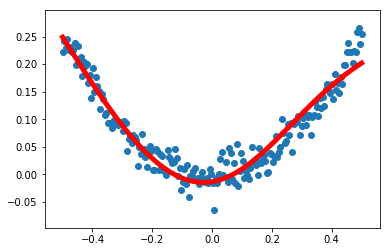

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_op, {input_x: data_x, input_y: data_y})

    predicted_value = sess.run(predicted_y, {input_x: data_x})
    
    plt.figure()
    plt.scatter(data_x, data_y)
    plt.plot(data_x, predicted_value, 'r-', lw=5)